In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Constants
# Data Location
LOC = "Limited_set"
Model_LOC = "alex_rip_off_pizza_included_final.h5"

In [ ]:
def pre_process_placeholder(in_data):
    """
    A simple placeholder function to adjust for the lack of a need for special image pre-processing for our implementation
    This function exists to allow for simple dictionary replacement in a global-usage testing method
    :param in_data: the data
    :return: the data as is
    """
    return in_data

In [ ]:
def fetch_class(res):
    """
    Function for finding the class as provided by our AlexNet implementation
    :param res: the result as produced by our AlexNet's implementation's predict method
    :return: the class identified as the most likely
    """
    return  ["n01532829", "n02802426", "n03337140", "n04579145", "n07873807"][np.argmax(res)]

In [ ]:
# Dictionaries that map pretrained models to their required functionality to be subbed in during operations
models = {
    "Xception": tf.keras.applications.xception.Xception(weights="imagenet"),
    "VGG16": tf.keras.applications.vgg16.VGG16(weights="imagenet"),
    "VGG19": tf.keras.applications.vgg19.VGG19(weights="imagenet"),
    "InceptionV3": tf.keras.applications.InceptionV3(weights="imagenet"),
    "ResNet50": tf.keras.applications.resnet50.ResNet50(weights="imagenet"),
    "AlexNet": tf.keras.models.load_model(Model_LOC)
}

# Does the model allow for top 5 validation?
extended = {
    "Xception": True,
    "VGG16": True,
    "VGG19": True,
    "InceptionV3": True,
    "ResNet50": True,
    "AlexNet": False
}

# PreProcessing System
preproc = {
    "Xception": tf.keras.applications.xception.preprocess_input,
    "VGG16": tf.keras.applications.vgg16.preprocess_input,
    "VGG19": tf.keras.applications.vgg19.preprocess_input,
    "InceptionV3": tf.keras.applications.inception_v3.preprocess_input,
    "ResNet50": tf.keras.applications.resnet50.preprocess_input,
    "AlexNet": pre_process_placeholder
}

# The required decode method
decode = {
    "Xception": tf.keras.applications.imagenet_utils.decode_predictions,
    "VGG16": tf.keras.applications.imagenet_utils.decode_predictions,
    "VGG19": tf.keras.applications.imagenet_utils.decode_predictions,
    "InceptionV3": tf.keras.applications.imagenet_utils.decode_predictions,
    "ResNet50": tf.keras.applications.imagenet_utils.decode_predictions,
    "AlexNet": fetch_class
}

In [ ]:
def test_model(model):
    """
    Function to test a given model and to calculate the accuracy of the model (given a pre-trained model based on a larger set, it also calculates a top 5 accuracy)
    :param model: the string model name to map through the various dictionary
    :return: the top 1 accuracy of hte model
    """
    print("Running tests on model:", model)
    count = 0
    top1 = 0
    top5 = 0
    for i in train:
        for j in range(len(i[1])):
            count += 1
            data_pre_pre_processing = i[0][j]
            data_pre_pre_processing = np.expand_dims(data_pre_pre_processing, axis=0)
            copy_of_data = np.copy(data_pre_pre_processing)
            processed_data = preproc[model](copy_of_data)
            res = models[model].predict(processed_data, verbose=0)
            label = decode[model](res)
            top5_list = []
            if extended[model]:
                for k in label[0]:
                    top5_list.append(k[0])
                if label[0][0][0] == train.class_names[int(i[1][j])]:
                    top1 += 1
                    top5 += 1
                elif train.class_names[int(i[1][j])] in top5_list:
                    top5 += 1
            else:
                if label == train.class_names[int(i[1][j])]:
                    top1 += 1
    print("Accuracy: " + str((top1/count) * 100) + "%" )
    if extended[model]:
        print("Top 5 Accuracy: " + str((top5/count) * 100) + "%")
    print("\n\n")
    return (top1/count) * 100



In [ ]:
accuracy_dict = {} # Dictionary that can be used for populating charts or other visualizations
for model1 in models:
    shapes = models[model1].get_config()["layers"][0]["config"]["batch_input_shape"]
    shape = (shapes[1], shapes[2])
    # train, test = tf.keras.preprocessing.image_dataset_from_directory(LOC, validation_split=.99, subset="both", seed=42, image_size=shape, batch_size=32) # IF you need to split for different sizes of data for quick testing. Comment the line below instead
    train = tf.keras.preprocessing.image_dataset_from_directory(LOC, image_size=shape, batch_size=32)
    accuracy_dict[model1] = test_model(model1)



In [ ]:
# Recording of the data recorded in our testing (and as reported in the report). Running of the full application should produce the same results in the accuracy_dict dictionary.
# This cell should not be run if the main processes are left to complete

accuracy_dict = {
    "Xception": 93.49320543565149,
    "VGG16": 79.9040767386091,
    "VGG19": 79.40847322142287,
    "InceptionV3": 93.86091127098322,
    "ResNet50": 86.68265387689848,
    "AlexNet": 97.10631494804157
}

In [ ]:
plt.bar(range(len(accuracy_dict)), list(accuracy_dict.values()), tick_label=list(accuracy_dict.keys()))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.show()

In [ ]:
# Recording of the data recorded in our testing (and as reported in the report). Running of the full application should produce the same results in the accuracy_dict dictionary.
# This cell should not be run if the main processes are left to complete

accuracy_dict = {
    "Xception": 93.49320543565149,
    "VGG16": 79.9040767386091,
    "VGG19": 79.40847322142287,
    "InceptionV3": 93.86091127098322,
    "ResNet50": 86.68265387689848,
    "AlexNet": 97.10631494804157
}

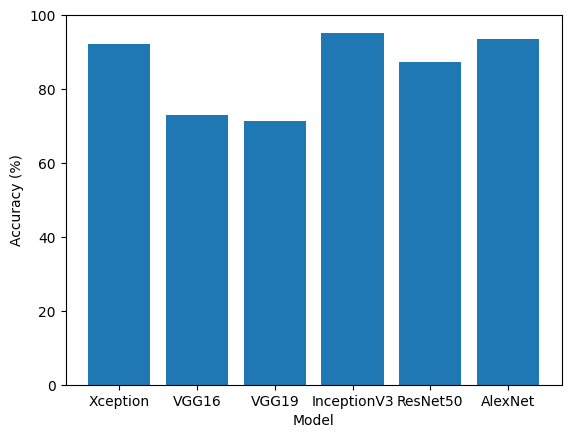

In [102]:
plt.bar(range(len(accuracy_dict)), list(accuracy_dict.values()), tick_label=list(accuracy_dict.keys()))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.show()